Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Reading the data

In [2]:
df_raw = pd.read_csv('ex2/ex2data1.txt', header=None)

In [3]:
df_raw

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df_raw.rename(columns = {0 : 'exam1', 1 : 'exam2', 2: 'decision'}, inplace = True)

Plotting

In [5]:
xs = df_raw[df_raw['decision'] == 0]
os = df_raw[df_raw['decision'] == 1]

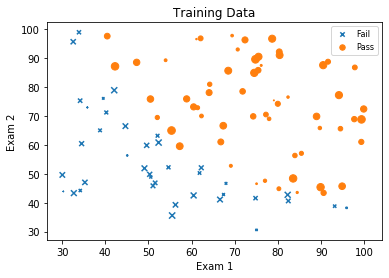

In [6]:
fig, ax1 = plt.subplots()
ax1.scatter(xs['exam1'], xs['exam2'], np.arange(xs['exam1'].shape[0]), marker = 'x')
ax1.scatter(os['exam1'], os['exam2'], np.arange(os['exam1'].shape[0]), marker = 'o')
ax1.set_xlabel('Exam 1')
ax1.set_ylabel('Exam 2')
ax1.set_title('Training Data')
ax1.legend(['Fail', 'Pass'], loc = 'upper right', fontsize = 8)

Logistic Regression without Regularization

In [7]:
log = linear_model.LogisticRegression(solver='lbfgs' ,penalty='none')

In [8]:
log.fit(np.transpose(np.asarray([df_raw['exam1'], df_raw['exam2']])), df_raw['decision'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
log.score(np.transpose(np.asarray([df_raw['exam1'], df_raw['exam2']])), df_raw['decision'])

0.89

In [10]:
log.coef_, log.intercept_

(array([[0.20623222, 0.20147191]]), array([-25.16138567]))

Plot with Regression Line

In [11]:
x = np.arange(30,101)
line = -((log.coef_[0][0]*x) + log.intercept_)/log.coef_[0][1]

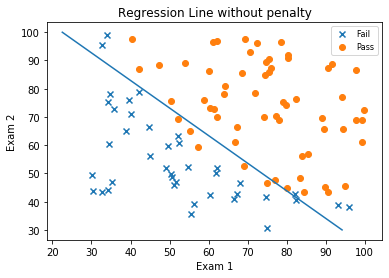

In [13]:
fig, ax2 = plt.subplots()
ax2.scatter(xs['exam1'], xs['exam2'], marker = 'x')
ax2.scatter(os['exam1'], os['exam2'], marker = 'o')
ax2.set_xlabel('Exam 1')
ax2.set_ylabel('Exam 2')
ax2.set_title('Regression Line without penalty')
ax2.legend(['Fail', 'Pass'], loc = 'upper right', fontsize = 8)
ax2.plot(line, x)

Cost Function

In [68]:
y_hat = log.predict_proba(np.transpose(np.asarray([df_raw['exam1'], df_raw['exam2']])))

In [69]:
def cost_func(y, yh, n):
    t1 = y*np.log(yh)
    t2 = (1-y)*(np.log(1-yh))
    t3 = np.sum(-t1-t2)
    t4 = t3/n
    return t4

In [73]:
cost = cost_func(y = np.asarray(df_raw['decision']), yh = y_hat[:,1], n = df_raw.shape[0])
cost

0.20349770159026448

In [86]:
log.predict_proba(np.array([45, 85]).reshape(1,-1))

array([[0.22370987, 0.77629013]])

In [85]:
log.predict(np.array([45, 85]).reshape(1,-1))

array([1], dtype=int64)